In [1]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import load_iris
import pandas as pd

iris= load_iris()
irisDF = pd.DataFrame(iris.data, columns = iris.feature_names)
irisDF

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [41]:
dbscan = DBSCAN(eps=0.6, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

In [42]:
irisDF.groupby(['target','dbscan_cluster']).count()['sepal length (cm)']

target  dbscan_cluster
0       -1                 1
         0                49
1       -1                 4
         1                46
2       -1                 8
         1                42
Name: sepal length (cm), dtype: int64

# 시각화 위해 PCA(4->2차원) 실행

In [43]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=0)
pca_transformed = pca.fit_transform(iris.data)
pca_transformed

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

In [44]:
irisDF['ftr1'] = pca_transformed[:,0]
irisDF['ftr2'] = pca_transformed[:,1]
irisDF

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),dbscan_cluster,target,ftr1,ftr2
0,5.1,3.5,1.4,0.2,0,0,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,0,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,0,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,0,0,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,0,0,-2.728717,0.326755
...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1,2,1.944110,0.187532
146,6.3,2.5,5.0,1.9,1,2,1.527167,-0.375317
147,6.5,3.0,5.2,2.0,1,2,1.764346,0.078859
148,6.2,3.4,5.4,2.3,1,2,1.900942,0.116628


In [45]:
np.unique(irisDF['dbscan_cluster'])

array([-1,  0,  1], dtype=int64)

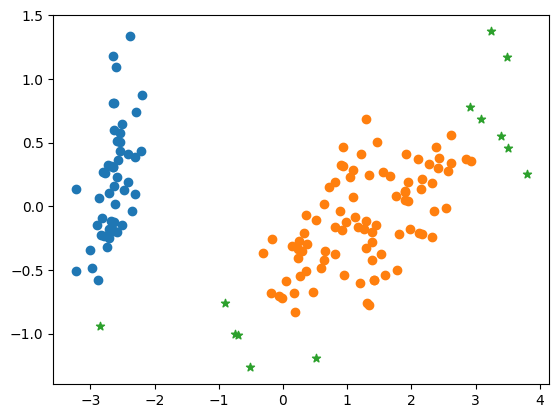

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.scatter(x=irisDF[irisDF['dbscan_cluster'] ==0]['ftr1'], y=irisDF[irisDF['dbscan_cluster'] ==0]['ftr2'])
plt.scatter(x=irisDF[irisDF['dbscan_cluster'] ==1]['ftr1'], y=irisDF[irisDF['dbscan_cluster'] ==1]['ftr2'])
plt.scatter(x=irisDF[irisDF['dbscan_cluster'] ==-1]['ftr1'], y=irisDF[irisDF['dbscan_cluster'] ==-1]['ftr2'],marker = '*')
